In [1]:
import os

# Pour contourner le problème d'incompatibilité de version TF.
# Erreur se produit avec Lambda
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import keras
from keras import Input
from keras import layers
from keras import backend as K
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, LSTM, Bidirectional, GRU, Attention
from keras.layers import Conv1D, MaxPooling1D, Reshape, GaussianNoise
from keras.models import load_model

import matplotlib.pyplot as plt
from scipy.stats import norm

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from numpy import vstack

import numpy as np
import pandas as pd

import tensorflow as tf 

import scipy 
from scipy.signal import resample

Instructions for updating:
non-resource variables are not supported in the long term


## 1. Predict Spectra

### Import data

In [2]:
#df_I_Vg_1st = pd.read_csv("./Data/Training/peak400_470nm-txt_2023-06-13_1111/dataIVG1st_peak400_470nm.txt", sep=",", header=None)
#df_P_lambda_1st = pd.read_csv("./Data/Training/peak400_470nm-txt_2023-06-13_1111/Plambda1st_peak400_470nm.txt", sep=",", header=None)

In [3]:
#df_I_Vg_2nd = pd.read_csv("./Data/Training/peak425_520nm-txt_2023-06-13_1118/dataIVG2nd_peak425_520nm.txt", sep=",", header=None)
#df_P_lambda_2nd = pd.read_csv("./Data/Training/peak425_520nm-txt_2023-06-13_1118/Plambda2nd_peak425_520nm.txt", sep=",", header=None)

In [4]:
#df_I_Vg_3rd = pd.read_csv("./Data/Training/peak475_560nm_2023-06-13_1125/dataIVG3rd_peak475_560nm.txt", sep=",", header=None)
#df_P_lambda_3rd = pd.read_csv("./Data/Training/peak475_560nm_2023-06-13_1125/Plambda3rd_peak475_560nm.txt", sep=",", header=None)

In [5]:
#df_I_Vg_4th = pd.read_csv("./Data/Training/peak535_625nm-txt_2023-06-13_1129/dataIVG4st_peak535_625nm.txt", sep=",", header=None)
#df_P_lambda_4th = pd.read_csv("./Data/Training/peak535_625nm-txt_2023-06-13_1129/Plambda4st_peak535_625nm.txt", sep=",", header=None)

In [6]:
#df_I_Vg_5th = pd.read_csv("./Data/Training/peak575_665nm-txt_2023-06-13_1135/dataIVG5th_peak575_665nm.txt", sep=",", header=None)
#df_P_lambda_5th = pd.read_csv("./Data/Training/peak575_665nm-txt_2023-06-13_1135/Plambda5th_peak575_665nm.txt", sep=",", header=None)

In [7]:
#df_I_Vg_6th = pd.read_csv("./Data/Training/peak630_800nm-txt_2023-06-13_1156/dataIVG8th_peak630_800nm.txt", sep=",", header=None)
#df_P_lambda_6th = pd.read_csv("./Data/Training/peak630_800nm-txt_2023-06-13_1156/Plambda8th_peak630_800nm.txt", sep=",", header=None)

In [8]:
#df_I_Vg_7th = pd.read_csv("./Data/Training/peak640_725nm-txt_2023-06-13_1140/dataIVG6st_peak640_725nm.txt", sep=",", header=None)
#df_P_lambda_7th = pd.read_csv("./Data/Training/peak640_725nm-txt_2023-06-13_1140/Plambda6st_peak640_725nm.txt", sep=",", header=None)

In [9]:
#df_I_Vg_8th = pd.read_csv("./Data/Training/peak675_755nm-txt_2023-06-13_1149/dataIVG7th_peak675_755nm.txt", sep=",", header=None)
#df_P_lambda_8th = pd.read_csv("./Data/Training/peak675_755nm-txt_2023-06-13_1149/Plambda7th_peak675_755nm.txt", sep=",", header=None)

In [10]:
#frames = [df_I_Vg_1st, df_I_Vg_2nd, df_I_Vg_3rd, df_I_Vg_4th, df_I_Vg_5th, df_I_Vg_6th, df_I_Vg_7th, df_I_Vg_8th] 
#df_I_Vg = df_I_Vg_3rd#pd.concat(frames, axis=1)

#frames = [df_P_lambda_1st, df_P_lambda_2nd, df_P_lambda_3rd, df_P_lambda_4th, df_P_lambda_5th, df_P_lambda_6th, df_P_lambda_7th, df_P_lambda_8th]
#df_P_lambda = df_P_lambda_3rd#pd.concat(frames, axis=1)

In [326]:
#df_I_Vg = pd.read_csv("./Data/Training/2023-06-16_2013/dataIVG1.txt", sep=",", header=None)
#df_P_lambda = pd.read_csv("./Data/Training/2023-06-16_2013/Data_tofitPlambda1.txt", sep=",", header=None)

peak_nbr = str(5);
df_I_Vg = pd.read_csv("./Data/Training/2023-06-17_0743/dataIVGpeak" + peak_nbr + ".txt", sep=",", header=None)
df_P_lambda = pd.read_csv("./Data/Training/2023-06-17_0743/Plambdapeak" + peak_nbr + ".txt", sep=",", header=None)

In [327]:
print(df_I_Vg.shape)
print(df_P_lambda.shape)

(81, 100000)
(81, 100000)


In [328]:
start=51
end=81

In [329]:
I_Vg_initial = df_I_Vg.values[start:end]
P_lambda_initial = df_P_lambda.values

In [330]:
scaler = MaxAbsScaler()#StandardScaler()
I_Vg = scaler.fit_transform(I_Vg_initial)

scaler2 = MaxAbsScaler()#StandardScaler()
P_lambda = scaler2.fit_transform(P_lambda_initial)

In [331]:
print(I_Vg.shape)
print(P_lambda.shape)

(30, 100000)
(81, 100000)


In [332]:
I_Vg_train, I_Vg_test, P_lambda_train, P_lambda_test = train_test_split(I_Vg.T, P_lambda.T, test_size=0.15, random_state=42, shuffle=True)
I_Vg_train, I_Vg_val, P_lambda_train, P_lambda_val = train_test_split(I_Vg_train, P_lambda_train, test_size=0.15, random_state=1)

In [333]:
dim = I_Vg_train.T.shape[0]

In [334]:
print(I_Vg_train.shape)
print(P_lambda_train.shape)

print(I_Vg_test.shape)
print(P_lambda_test.shape)

print(I_Vg_val.shape)
print(P_lambda_val.shape)

(72250, 30)
(72250, 81)
(15000, 30)
(15000, 81)
(12750, 30)
(12750, 81)


### Some plots

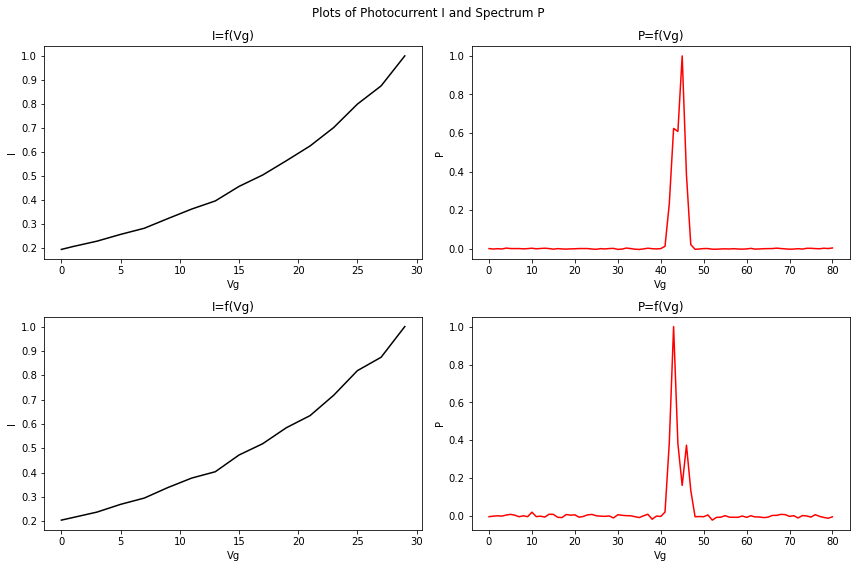

In [335]:
fig, axs = plt.subplots(2,2, figsize=(12, 8))
fig.suptitle('Plots of Photocurrent I and Spectrum P')

axs[0, 0].set_title('I=f(Vg)')
axs[0, 0].set(ylabel='I')
axs[0,0].plot(I_Vg_train.T[:,0], color='black')

axs[0, 1].set_title('P=f(Vg)')
axs[0, 1].set(ylabel='P')
axs[0,1].plot(P_lambda_train.T[:,0], color='red')

axs[1, 0].set_title('I=f(Vg)')
axs[1, 0].set(ylabel='I')
axs[1,0].plot(I_Vg_train.T[:,10], color='black')

axs[1, 1].set_title('P=f(Vg)')
axs[1, 1].set(ylabel='P')
axs[1,1].plot(P_lambda_train.T[:,10], color='red')

for ax in axs.flat:
    ax.set(xlabel='Vg')

fig.tight_layout()

### useful functions

In [336]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='validation')
    plt.legend();

In [337]:
def plotSpectra(predicted_P_lambda_1, predicted_P_lambda_2, observed_P_lambda_1, observed_P_lambda_2):
    fig, axs = plt.subplots(2,2, figsize=(12, 8))
    fig.suptitle('Plots of reconstructed spectra P')
    
    X = np.arange(400, 400 + observed_P_lambda_1.size*5, 5)
    
    axs[0,0].set_title('Measured')
    axs[0,0].set(ylabel='Intensity [A.U]')
    axs[0,0].set(xlabel='$\lambda$ [$nm$]')
    axs[0,0].plot(X, observed_P_lambda_1, color='black')

    axs[0,1].set_title('Reconstructed')
    axs[0,1].set(ylabel='Intensity [A.U]')
    axs[0,1].set(xlabel='$\lambda$ [$nm$]')
    axs[0,1].plot(X, predicted_P_lambda_1.T, color='red', linestyle='dashed')

    axs[1,0].set_title('Measured')
    axs[1,0].set(ylabel='Intensity [A.U]')
    axs[1,0].set(xlabel='$\lambda$ [$nm$]')
    axs[1,0].plot(X, observed_P_lambda_2, color='black')
    
    axs[1,1].set_title('Reconstructed')
    axs[1,1].set(ylabel='Intensity [A.U]')
    axs[1,1].set(xlabel='$\lambda$ [$nm$]')
    axs[1,1].plot(X, predicted_P_lambda_2.T, color='red', linestyle='dashed')

    fig.tight_layout()

In [338]:
def plotSpectra2(I_Vg_1, I_Vg_2, predicted_P_lambda_1, predicted_P_lambda_2, observed_P_lambda_1, observed_P_lambda_2):
    
    fig, axs = plt.subplots(1,2, figsize=(12, 6))
    #fig.suptitle('Plots of reconstructed spectra P')
    
    X = np.arange(400, 400 +  observed_P_lambda_1.size*5, 5)
    
    axs[0].set(ylabel='Intensity [A.U]')
    axs[0].set(xlabel='$\lambda$ [$nm$]')
    axs[0].plot(X, observed_P_lambda_1, color='black')
    
    X2 = np.arange(0, I_Vg_1.size, 1).reshape(I_Vg_1.shape)
    ins1 = axs[0].inset_axes([0.6,0.75,0.3,0.2])
    ins1.set(xlabel='$V_g$', ylabel='I [A.U]')
    ins1.plot(X2, I_Vg_1, color='blue')
    
    ax1=axs[0].twinx()

    #ax1.set(ylabel='Intensity [A.U]')
    ax1.set(xlabel='$\lambda$ [$nm$]')
    ax1.plot(X, predicted_P_lambda_1.T, color='red', linestyle='dashed')
    
    ax1.yaxis.set_tick_params(labelright=False)
    ax1.set_yticks([])

    axs[1].set(ylabel='Intensity [A.U]')
    axs[1].set(xlabel='$\lambda$ [$nm$]')
    axs[1].plot(X, observed_P_lambda_2, color='black')
    
    ins2 = axs[1].inset_axes([0.6,0.75,0.3,0.2])
    ins2.set(xlabel='$V_g$', ylabel='I [A.U]')
    ins2.plot(X2, I_Vg_2, color='blue')
    
    ax2=axs[1].twinx()
    
    #ax2.set(ylabel='Intensity [A.U]')
    ax2.set(xlabel='$\lambda$ [$nm$]')
    ax2.plot(X, predicted_P_lambda_2.T, color='red', linestyle='dashed')
    
    ax2.yaxis.set_tick_params(labelright=False)
    ax2.set_yticks([])

    fig.tight_layout()

In [339]:
def plotSpectra3(I_Vg_1, exp_lambda, observed_P_lambda_1, predicted_P_lambda_1):
    
    fig, axs = plt.subplots(figsize=(6, 6))
    
    X1 = exp_lambda
    X2 = np.arange(400, 400 + predicted_P_lambda_1.size*5, 5)  
    X3 = np.arange(0, I_Vg_1.size, 1).reshape(I_Vg_1.shape)
    
    axs.set(ylabel='Intensity [A.U]')
    axs.set(xlabel='$\lambda$ [$nm$]')
    
    axs.plot(X1, observed_P_lambda_1.T, color='black', linestyle='solid')
    
    ax2=axs.twinx()
    
    ax2.plot(X2, predicted_P_lambda_1.T, color='red', linestyle='dashed')
    
    ins1 = axs.inset_axes([0.15,0.75,0.3,0.2])
    ins1.set(xlabel='$V_g$', ylabel='I [A.U]')
    ins1.plot(X3.T, I_Vg_1.T, color='blue')
    
    ax2.yaxis.set_tick_params(labelright=False)
    ax2.set_yticks([])

    fig.tight_layout()

In [340]:
def plotSpectra4(exp_IVg, observed_P_lambda_1, IVg, predicted_P_lambda_1):
    
    fig, axs = plt.subplots(figsize=(6, 6))
    
    axs.set(ylabel='Intensity [A.U]')
    axs.set(xlabel='$\lambda$ [$nm$]')
    
    axs.plot(exp_IVg, observed_P_lambda_1, color='black', linestyle='solid')
    
    ax2=axs.twinx()
    
    ax2.plot(IVg, predicted_P_lambda_1, color='red', linestyle='dashed')
    
    ax2.yaxis.set_tick_params(labelright=False)
    ax2.set_yticks([])

    fig.tight_layout()

### Define some models

In [341]:
def CNN_model(input_dim: int):
    model = Sequential()
    # A bit of gaussian noise which works as regularization
    model.add(GaussianNoise(0.001, input_shape=(input_dim,)))
    model.add(Reshape((input_dim, 1)))
    # Nbr of filters and kernel size
    model.add(Conv1D(32, 5, padding="same", activation='linear'))
    model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))
    model.add(Conv1D(64, 5, padding="same", activation='linear'))
    model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))
    model.add(Conv1D(32, 5, padding="same", activation='relu'))
    model.add(MaxPooling1D(pool_size=2, strides=2, padding='valid'))
    model.add(Flatten())
    #model.add(Dropout(0.1))
    model.add(Dense(32, activation='linear'))
    model.add(Dense(81, activation='linear'))

    model.compile(loss='mse', optimizer=tf.optimizers.Adadelta(learning_rate=0.03))

    return model

In [380]:
def MLP_model(input_dim: int):
    
    model = Sequential()
    model.add(Dense(input_dim, input_dim=input_dim, activation='linear'))
    model.add(Dense(10, activation='linear'))
    model.add(Dense(input_dim, activation='linear'))
    model.add(Dense(81, activation='linear'))

    model.compile(loss='mse', optimizer=tf.optimizers.Adadelta(learning_rate=0.03))

    return model

In [358]:
def RNN_model(input_dim: int):
    
    look_back = 1
    model = Sequential()
    model.add(GRU(81, input_shape=(look_back, input_dim), return_sequences=True))
    
    #forward_layer = LSTM(41, return_sequences=True)
    #backward_layer = LSTM(40, activation='relu', return_sequences=True, go_backwards=True)
    #model.add(Bidirectional(forward_layer, backward_layer=backward_layer, input_shape=(look_back, input_dim)))
    
    model.compile(loss='mean_squared_error', optimizer=tf.optimizers.Adam(learning_rate=0.03))
    
    return model

In [344]:
def Autoencoder_model(input_dim: int):
    input_sig = keras.Input(shape=(input_dim,))

    encoded = layers.Dense(48, activation='linear')(input_sig)
    encoded = layers.Dense(16, activation='linear')(encoded)

    decoded = layers.Dense(48, activation='linear')(encoded)
    decoded = layers.Dense(81, activation='linear')(decoded)

    autoencoder = keras.Model(input_sig, decoded)
    autoencoder.compile(optimizer='sgd', loss='mse')
      
    return autoencoder

### Train a model

In [345]:
print(dim)
print(I_Vg_train.shape)
print(P_lambda_train.shape)
print(I_Vg_val.shape)
print(P_lambda_val.shape)

30
(72250, 30)
(72250, 81)
(12750, 30)
(12750, 81)


### Autoencoders

In [31]:
model_autoencoder = Autoencoder_model(dim)

In [32]:
history_ae = model_autoencoder.fit(
                I_Vg_train, P_lambda_train,
                epochs=50,
                #batch_size=12,
                shuffle=True,
                validation_data=(I_Vg_val, P_lambda_val)
                )

Train on 72250 samples, validate on 12750 samples
Epoch 1/50
71392/72250 [============================>.] - ETA: 0s - loss: 0.0152WARNING:tensorflow:From C:\Users\Besitzer\.conda\envs\DL\lib\site-packages\tensorflow\python\keras\engine\training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
72250/72250 [==============================] - 1s 15us/sample - loss: 0.0151 - val_loss: 0.0113
Epoch 2/50
72250/72250 [==============================] - 1s 15us/sample - loss: 0.0106 - val_loss: 0.0102
Epoch 3/50
72250/72250 [==============================] - 1s 14us/sample - loss: 0.0101 - val_loss: 0.0100
Epoch 4/50
72250/72250 [==============================] - 1s 16us/sample - loss: 0.0100 - val_loss: 0.0100
Epoch 5/50
72250/72250 [==============================] - 1s 15us/sample - loss: 0.0100

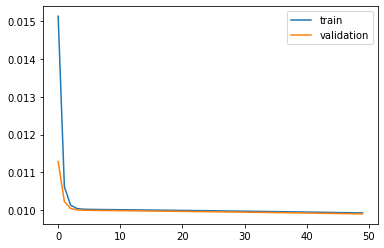

In [33]:
plot_loss(history_ae)

In [34]:
#model_autoencoder.save("./Data/Models/AE_1st_400_800nm.h5")
#model_autoencoder = load_model("./Data/Models/AE_1st_400_800nm.h5")

In [35]:
idx1a = 90; idx2a = 1120
I_Vg_test_1a = I_Vg_test[idx1a,:].reshape(1,-1)
I_Vg_test_2a = I_Vg_test[idx2a,:].reshape(1,-1)

In [36]:
P_lambda_1a = model_autoencoder.predict(I_Vg_test_1a)
P_lambda_2a = model_autoencoder.predict(I_Vg_test_2a)

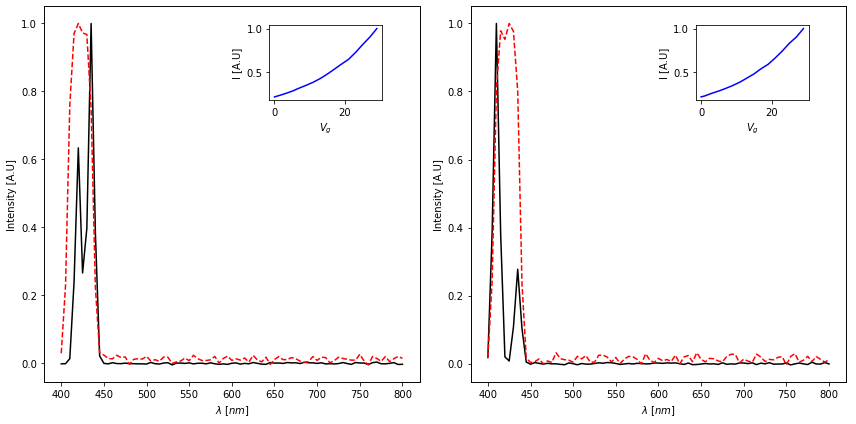

In [37]:
#plotSpectra(P_lambda_1a, P_lambda_2a, P_lambda_test[idx1a,:], P_lambda_test[idx2a,:])
plotSpectra2(I_Vg_test_1a.T, I_Vg_test_2a.T, P_lambda_1a, P_lambda_2a, P_lambda_test[idx1a,:], P_lambda_test[idx2a,:])

In [38]:
export = np.hstack((
    P_lambda_1a.T, 
    np.array([P_lambda_test[idx1a,:]]).T, 
    P_lambda_2a.T, 
    np.array([P_lambda_test[idx2a,:]]).T
))

np.savetxt("./CSV/AE" + peak_nbr + ".csv", export, delimiter=';', #fmt='%.10f'
           header="I_Vg_test_1;P_lambda_calc_1;P_lambda_test_1;I_Vg_test_2;P_lambda_calc_2;P_lambda_test_2")

### CNN

In [39]:
model_CNN = CNN_model(dim)

In [40]:
hist_CNN = model_CNN.fit(I_Vg_train, P_lambda_train, 
                         epochs=180, 
                         #batch_size=12, 
                         shuffle=True, 
                         validation_data=(I_Vg_val, P_lambda_val))

Train on 72250 samples, validate on 12750 samples
Epoch 1/180
72250/72250 [==============================] - 4s 58us/sample - loss: 0.0138 - val_loss: 0.0105
Epoch 2/180
72250/72250 [==============================] - 5s 72us/sample - loss: 0.0102 - val_loss: 0.0100
Epoch 3/180
72250/72250 [==============================] - 5s 72us/sample - loss: 0.0100 - val_loss: 0.0100
Epoch 4/180
72250/72250 [==============================] - 5s 73us/sample - loss: 0.0100 - val_loss: 0.0100
Epoch 5/180
72250/72250 [==============================] - 5s 72us/sample - loss: 0.0100 - val_loss: 0.0100
Epoch 6/180
72250/72250 [==============================] - 5s 73us/sample - loss: 0.0100 - val_loss: 0.0100
Epoch 7/180
72250/72250 [==============================] - 5s 73us/sample - loss: 0.0100 - val_loss: 0.0100
Epoch 8/180
72250/72250 [==============================] - 5s 75us/sample - loss: 0.0100 - val_loss: 0.0100
Epoch 9/180
72250/72250 [==============================] - 5s 72us/sample - loss: 0.01

72250/72250 [==============================] - 5s 74us/sample - loss: 0.0033 - val_loss: 0.0033
Epoch 150/180
72250/72250 [==============================] - 5s 73us/sample - loss: 0.0033 - val_loss: 0.0032
Epoch 151/180
72250/72250 [==============================] - 5s 74us/sample - loss: 0.0033 - val_loss: 0.0032
Epoch 152/180
72250/72250 [==============================] - 5s 74us/sample - loss: 0.0033 - val_loss: 0.0032
Epoch 153/180
72250/72250 [==============================] - 5s 74us/sample - loss: 0.0032 - val_loss: 0.0031
Epoch 154/180
72250/72250 [==============================] - 5s 75us/sample - loss: 0.0032 - val_loss: 0.0031
Epoch 155/180
72250/72250 [==============================] - 6s 76us/sample - loss: 0.0032 - val_loss: 0.0031
Epoch 156/180
72250/72250 [==============================] - 5s 76us/sample - loss: 0.0032 - val_loss: 0.0031
Epoch 157/180
72250/72250 [==============================] - 5s 75us/sample - loss: 0.0032 - val_loss: 0.0031
Epoch 158/180
72250/7225

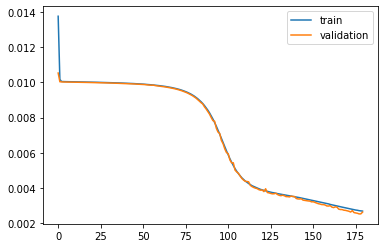

In [41]:
plot_loss(hist_CNN)

In [42]:
model_CNN.save("./Data/Models/CNN_"  + peak_nbr +  ".h5")
#model_CNN = load_model("./Data/Models/CNN_400_800_nm.h5")

In [43]:
idx1b = 91; idx2b = 1121
I_Vg_test_1b = I_Vg_test[idx1b,:].reshape(1,-1)
I_Vg_test_2b = I_Vg_test[idx2b,:].reshape(1,-1)

In [44]:
P_lambda_1b = model_CNN.predict(I_Vg_test_1b)
P_lambda_2b = model_CNN.predict(I_Vg_test_2b)

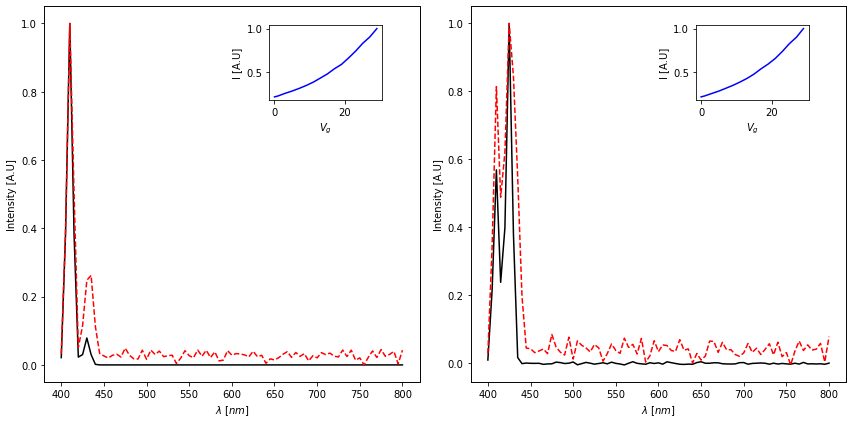

In [45]:
#plotSpectra(P_lambda_1b, P_lambda_2b, P_lambda_test[idx1b,:], P_lambda_test[idx2b,:])
plotSpectra2(I_Vg_test_1b.T, I_Vg_test_2b.T, P_lambda_1b, P_lambda_2b, P_lambda_test[idx1b,:], P_lambda_test[idx2b,:])

In [46]:
export = np.hstack((
    P_lambda_1b.T, 
    np.array([P_lambda_test[idx1b,:]]).T, 
    P_lambda_2b.T, 
    np.array([P_lambda_test[idx2b,:]]).T
))

np.savetxt("./CSV/CNN" + peak_nbr + ".csv", export, delimiter=';', #fmt='%.2f'
           header="I_Vg_test_1;P_lambda_calc_1;P_lambda_test_1;I_Vg_test_2;P_lambda_calc_2;P_lambda_test_2")

### MLP

In [381]:
model_MLP = MLP_model(dim)

In [382]:
model_MLP.summary()

Model: "sequential_112"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_195 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_196 (Dense)            (None, 10)                310       
_________________________________________________________________
dense_197 (Dense)            (None, 30)                330       
_________________________________________________________________
dense_198 (Dense)            (None, 81)                2511      
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


In [383]:
hist_MLP = model_MLP.fit(I_Vg_train, P_lambda_train, 
                         epochs=30, 
                         #batch_size=4, 
                         shuffle=True, 
                         validation_data=(I_Vg_val, P_lambda_val))

Train on 72250 samples, validate on 12750 samples
Epoch 1/30
72250/72250 [==============================] - 2s 33us/sample - loss: 0.0180 - val_loss: 0.0095
Epoch 2/30
72250/72250 [==============================] - 2s 29us/sample - loss: 0.0090 - val_loss: 0.0088
Epoch 3/30
72250/72250 [==============================] - 2s 29us/sample - loss: 0.0088 - val_loss: 0.0088
Epoch 4/30
72250/72250 [==============================] - 2s 28us/sample - loss: 0.0088 - val_loss: 0.0088
Epoch 5/30
72250/72250 [==============================] - 2s 29us/sample - loss: 0.0088 - val_loss: 0.0087
Epoch 6/30
72250/72250 [==============================] - 2s 34us/sample - loss: 0.0088 - val_loss: 0.0087
Epoch 7/30
72250/72250 [==============================] - 2s 28us/sample - loss: 0.0087 - val_loss: 0.0087
Epoch 8/30
72250/72250 [==============================] - 2s 30us/sample - loss: 0.0087 - val_loss: 0.0087
Epoch 9/30
72250/72250 [==============================] - 2s 28us/sample - loss: 0.0087 - val_

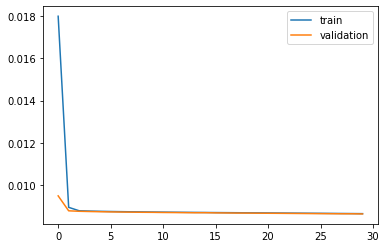

In [384]:
plot_loss(hist_MLP)

In [385]:
model_MLP.save("./Data/Models/MLP_" + peak_nbr + ".h5")
#model_MLP = load_model("./Data/Models/MLP_600_800_nm.h5 ")

In [386]:
idx1c = 91;idx2c = 1121
I_Vg_test_1c = I_Vg_test[idx1c,:].reshape(1,-1)
I_Vg_test_2c = I_Vg_test[idx2c,:].reshape(1,-1)

In [387]:
P_lambda_1c = model_MLP.predict(I_Vg_test_1c)
P_lambda_2c = model_MLP.predict(I_Vg_test_2c)

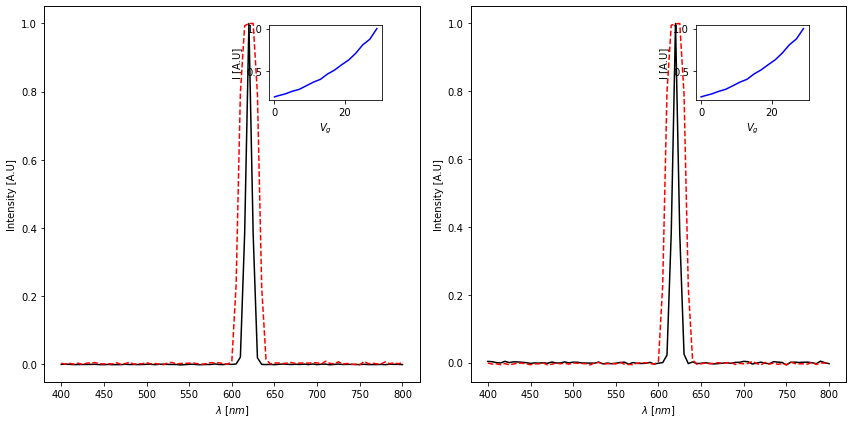

In [388]:
#plotSpectra(P_lambda_1c, P_lambda_2c, P_lambda_test[idx1c,:], P_lambda_test[idx2c,:])
plotSpectra2(I_Vg_test_1c.T, I_Vg_test_2c.T, P_lambda_1c, P_lambda_2c, P_lambda_test[idx1c,:], P_lambda_test[idx2c,:])

In [389]:
export = np.hstack((
    P_lambda_1c.T, 
    np.array([P_lambda_test[idx1c,:]]).T, 
    P_lambda_2c.T, 
    np.array([P_lambda_test[idx2c,:]]).T
))

np.savetxt("./CSV/MLP" + peak_nbr + ".csv", export, delimiter=';', #fmt='%.2f'
           header="P_lambda_calc_1;P_lambda_test_1;P_lambda_calc_2;P_lambda_test_2")

### RNN (LSTM or GRU)

In [159]:
#I_Vg_train_tmp = np.tile(I_Vg_train, (2, 1, 1))
#print(I_Vg_train_tmp.shape)
#I_Vg_train_tmp = np.swapaxes(I_Vg_train_tmp, 0, 1)
#I_Vg_train_2 = np.roll(I_Vg_train_tmp, shift=1, axis=2)
#I_Vg_train_2[:,1,0] = I_Vg_train_tmp[:,0,0]

#print(I_Vg_train_2.shape)
#print(I_Vg_train[0,:])
#print(I_Vg_train_tmp[0,0,:])
#print(I_Vg_train_2[0,1,:])

#I_Vg_val_tmp = np.tile(I_Vg_val, (2, 1, 1))
#print(I_Vg_val_tmp.shape)
#I_Vg_val_tmp = np.swapaxes(I_Vg_val_tmp, 0, 1)
#I_Vg_val_2 = np.roll(I_Vg_val_tmp, shift=1, axis=2)
#I_Vg_val_2[:,1,0] = I_Vg_val_tmp[:,0,0]

In [160]:
I_Vg_train_RNN = np.expand_dims(I_Vg_train, axis=1)

P_lambda_train_RNN = P_lambda_train[:, np.newaxis, :]
#P_lambda_train_RNN = np.tile(P_lambda_train, (1, 2, 1))
#P_lambda_train_RNN = np.swapaxes(P_lambda_train, 0, 1)

I_Vg_val_RNN = np.expand_dims(I_Vg_val, axis=1)

P_lambda_val_RNN = P_lambda_val[:, np.newaxis, :]
#P_lambda_val_RNN = np.tile(P_lambda_val, (1, 2, 1))
#P_lambda_val_RNN = np.swapaxes(P_lambda_val, 0, 1)

In [161]:
print(I_Vg_train_RNN.shape)
print(I_Vg_val_RNN.shape)

print(P_lambda_train_RNN.shape)
print(P_lambda_val_RNN.shape)

(72250, 1, 30)
(12750, 1, 30)
(72250, 1, 81)
(12750, 1, 81)


In [162]:
model_RNN = RNN_model(dim)

In [163]:
hist_RNN = model_RNN.fit(I_Vg_train_RNN, P_lambda_train_RNN, 
                         epochs=200, 
                         #batch_size=16,
                         shuffle=True, 
                         validation_data=(I_Vg_val_RNN, P_lambda_val_RNN))

Train on 72250 samples, validate on 12750 samples
Epoch 1/200
72250/72250 [==============================] - 2s 31us/sample - loss: 0.0050 - val_loss: 0.0048
Epoch 2/200
72250/72250 [==============================] - 2s 28us/sample - loss: 0.0047 - val_loss: 0.0046
Epoch 3/200
72250/72250 [==============================] - 2s 30us/sample - loss: 0.0045 - val_loss: 0.0045
Epoch 4/200
72250/72250 [==============================] - 3s 35us/sample - loss: 0.0043 - val_loss: 0.0045
Epoch 5/200
72250/72250 [==============================] - 2s 31us/sample - loss: 0.0041 - val_loss: 0.0040
Epoch 6/200
72250/72250 [==============================] - 2s 33us/sample - loss: 0.0039 - val_loss: 0.0039
Epoch 7/200
72250/72250 [==============================] - 2s 31us/sample - loss: 0.0038 - val_loss: 0.0036
Epoch 8/200
72250/72250 [==============================] - 2s 31us/sample - loss: 0.0036 - val_loss: 0.0036
Epoch 9/200
72250/72250 [==============================] - 2s 29us/sample - loss: 0.00

Epoch 76/200
72250/72250 [==============================] - 2s 32us/sample - loss: 0.0011 - val_loss: 0.0011
Epoch 77/200
72250/72250 [==============================] - 2s 30us/sample - loss: 0.0011 - val_loss: 0.0011
Epoch 78/200
72250/72250 [==============================] - 2s 30us/sample - loss: 0.0011 - val_loss: 0.0011
Epoch 79/200
72250/72250 [==============================] - 2s 32us/sample - loss: 0.0011 - val_loss: 0.0011
Epoch 80/200
72250/72250 [==============================] - 2s 31us/sample - loss: 0.0011 - val_loss: 0.0011
Epoch 81/200
72250/72250 [==============================] - 2s 31us/sample - loss: 0.0011 - val_loss: 0.0011
Epoch 82/200
72250/72250 [==============================] - 2s 32us/sample - loss: 0.0011 - val_loss: 0.0011
Epoch 83/200
72250/72250 [==============================] - 2s 30us/sample - loss: 0.0011 - val_loss: 0.0011
Epoch 84/200
72250/72250 [==============================] - 2s 31us/sample - loss: 0.0011 - val_loss: 0.0010
Epoch 85/200
72250/

Epoch 147/200
72250/72250 [==============================] - 2s 31us/sample - loss: 7.6982e-04 - val_loss: 8.5785e-04
Epoch 148/200
72250/72250 [==============================] - 2s 30us/sample - loss: 7.6864e-04 - val_loss: 7.7013e-04
Epoch 149/200
72250/72250 [==============================] - 2s 30us/sample - loss: 7.6603e-04 - val_loss: 7.5320e-04
Epoch 150/200
72250/72250 [==============================] - 2s 30us/sample - loss: 7.6624e-04 - val_loss: 7.7249e-04
Epoch 151/200
72250/72250 [==============================] - 2s 32us/sample - loss: 7.5796e-04 - val_loss: 7.4462e-04
Epoch 152/200
72250/72250 [==============================] - 2s 31us/sample - loss: 7.5945e-04 - val_loss: 7.6444e-04
Epoch 153/200
72250/72250 [==============================] - 2s 30us/sample - loss: 7.5301e-04 - val_loss: 7.4948e-04
Epoch 154/200
72250/72250 [==============================] - 2s 33us/sample - loss: 7.5490e-04 - val_loss: 7.4291e-04
Epoch 155/200
72250/72250 [=============================

In [164]:
model_RNN.save("./Data/Models/RNN_" + peak_nbr + ".h5")
#model_RNN = load_model("./Data/Models/RNN_400_800_nm")

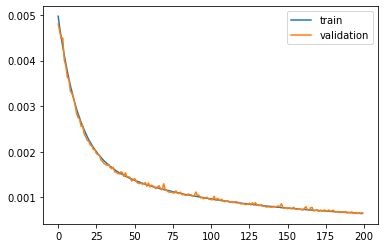

In [165]:
plot_loss(hist_RNN)

In [166]:
idx1d = 91; idx2d = 1121
I_Vg_test_1d = I_Vg_test[idx1d,:].reshape(1,-1)
I_Vg_test_2d = I_Vg_test[idx2d,:].reshape(1,-1)
I_Vg_test_RNN_1d = np.expand_dims(I_Vg_test_1d, axis=1)
I_Vg_test_RNN_2d = np.expand_dims(I_Vg_test_2d, axis=1)

In [167]:
P_lambda_1d = model_RNN.predict(I_Vg_test_RNN_1d).reshape(1,-1)
P_lambda_2d = model_RNN.predict(I_Vg_test_RNN_2d).reshape(1,-1)

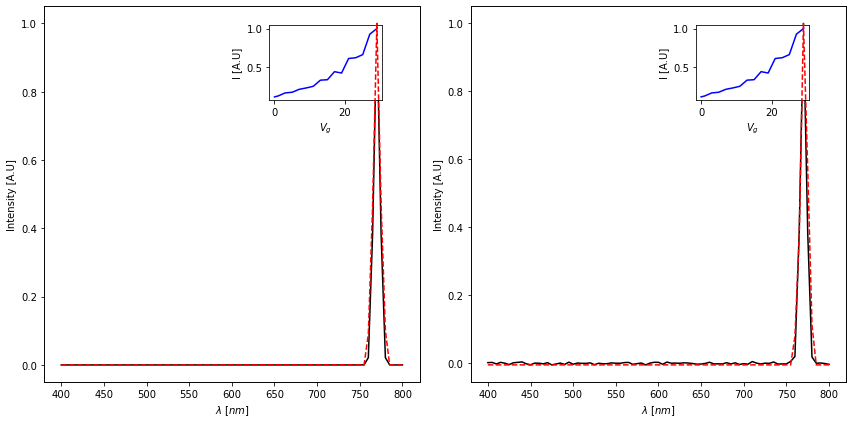

In [168]:
plotSpectra2(I_Vg_test_1d.T, I_Vg_test_2d.T, P_lambda_1d, P_lambda_2d, P_lambda_test[idx1d,:], P_lambda_test[idx2d,:])

In [169]:
export = np.hstack((
    P_lambda_1d.T, 
    np.array([P_lambda_test[idx1d,:]]).T, 
    P_lambda_2d.T, 
    np.array([P_lambda_test[idx2d,:]]).T
))

np.savetxt("./CSV/RNN" + peak_nbr + ".csv", export, delimiter=';', #fmt='%.10f'
           header="I_Vg_test_1;P_lambda_calc_1;P_lambda_test_1;I_Vg_test_2;P_lambda_calc_2;P_lambda_test_2")

### Experimental $I_{Vg}$ and spectra

In [170]:
#df_exp = pd.read_excel("./Data/520 LED.xlsx", sheet_name=0, header=0)
df_exp = pd.read_excel("./Data/exp_spectra.xlsx", sheet_name=0, header=0)

In [171]:
print(df_exp[0:81].shape)

(81, 19)


In [390]:
# For exp_spectra.xlsx 
df_exp_I_Vg = df_exp['I5']
df_exp_lambda = df_exp['wavelength']
df_exp_P_lambda = df_exp['P5']

In [391]:
exp_I_Vg = df_exp_I_Vg.values[start:end]
exp_I_Vg = scaler.fit_transform(exp_I_Vg.reshape(-1, 1))
exp_P_lambda = df_exp_P_lambda.values
exp_P_lambda = scaler2.fit_transform(exp_P_lambda.reshape(-1, 1))
exp_lambda = df_exp_lambda.values

In [392]:
# AE, CNN; MLP prediction
exp_P_lambda_sim = model_MLP.predict(exp_I_Vg.reshape(1,-1)).reshape(1,-1)

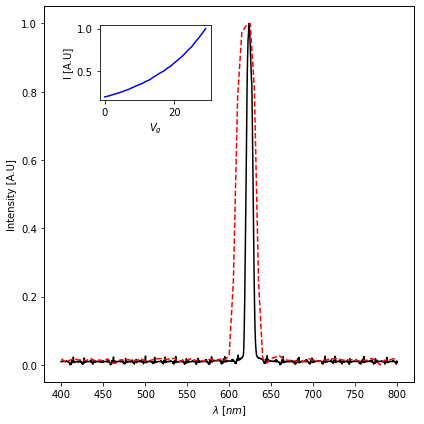

In [393]:
plotSpectra3(exp_I_Vg.T, exp_lambda, exp_P_lambda.T, exp_P_lambda_sim)

In [394]:
export = np.hstack((
    exp_lambda.reshape(-1,1), 
    exp_P_lambda, 
))

np.savetxt("./CSV/MLP_exp_" + peak_nbr + ".csv", export, delimiter=';', #fmt='%.2f'
           header="Exp_I_Vg;Exp_P_lambda")

X = np.arange(400, 400 + exp_P_lambda_sim.size*5, 5).reshape(-1,1)

export = np.hstack((
    X, 
    exp_P_lambda_sim.T, 
))

np.savetxt("./CSV/MLP_exp_sim_" + peak_nbr + ".csv", export, delimiter=';', #fmt='%.2f'
           header="Exp I_Vg;Exp P_lambda")

In [177]:
# For 520_LED.xlsx
#df_exp_Vg = df_exp['Vg (V)']
#df_exp_I_Vg = df_exp['Iph (A)']
#df_exp_lambda = df_exp['Wavelength (nm)']
#df_exp_P_lambda = df_exp['Intensity']

In [178]:
# RNN prediction
exp_I_Vg_tmp = exp_I_Vg.reshape(1,-1)
exp_I_Vg_RNN = np.expand_dims(exp_I_Vg_tmp, axis=1)
print(exp_I_Vg_RNN.shape)

(1, 1, 30)


In [179]:
exp_P_lambda_sim = model_RNN.predict(exp_I_Vg_RNN).reshape(1,-1)

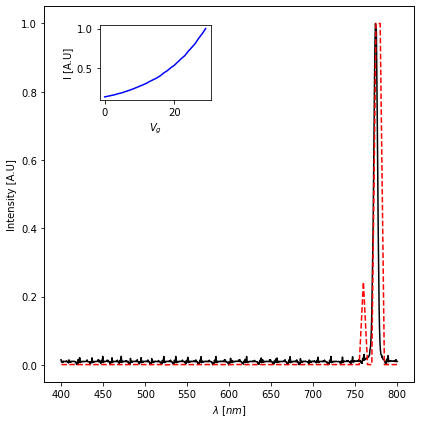

In [180]:
plotSpectra3(exp_I_Vg_RNN[0,:,:], exp_lambda, exp_P_lambda.T, exp_P_lambda_sim)

In [148]:
export = np.hstack((
    exp_lambda.reshape(-1,1), 
    exp_P_lambda, 
))

np.savetxt("./CSV/RNN_exp_" + peak_nbr + ".csv", export, delimiter=';', #fmt='%.2f'
           header="Exp_I_Vg;Exp_P_lambda")

X = np.arange(400, 400 + exp_P_lambda_sim.size*5, 5).reshape(-1,1)

export = np.hstack((
    X, 
    exp_P_lambda_sim.T, 
))

np.savetxt("./CSV/RNN_exp_sim_" + peak_nbr + ".csv", export, delimiter=';', #fmt='%.2f'
           header="Exp_I_Vg;Exp_P_lambda")

## Read all csv files - Simulated spectra

In [395]:
def get_files(path):
    return os.listdir(path)

In [396]:
dir_path = r'./CSV/'
all_files = get_files(dir_path)
        
print(all_files)

['AE.csv', 'AE1.csv', 'AE2.csv', 'AE3.csv', 'AE4.csv', 'AE5.csv', 'AE6.csv', 'AE8.csv', 'AE_400_800.csv', 'AE_exp_8.csv', 'AE_exp_sim_8.csv', 'CNN.csv', 'CNN1.csv', 'CNN2.csv', 'CNN3.csv', 'CNN4.csv', 'CNN5.csv', 'CNN6.csv', 'CNN8.csv', 'forAbid', 'MLP.csv', 'MLP1.csv', 'MLP2.csv', 'MLP3.csv', 'MLP4.csv', 'MLP5.csv', 'MLP6.csv', 'MLP8.csv', 'MLP_400_800.csv', 'MLP_exp1.csv', 'MLP_exp_1.csv', 'MLP_exp_2.csv', 'MLP_exp_3.csv', 'MLP_exp_4.csv', 'MLP_exp_5.csv', 'MLP_exp_6.csv', 'MLP_exp_8.csv', 'MLP_exp_sim_1.csv', 'MLP_exp_sim_2.csv', 'MLP_exp_sim_3.csv', 'MLP_exp_sim_4.csv', 'MLP_exp_sim_5.csv', 'MLP_exp_sim_6.csv', 'MLP_exp_sim_8.csv', 'RNN.csv', 'RNN1.csv', 'RNN2.csv', 'RNN3.csv', 'RNN4.csv', 'RNN5.csv', 'RNN6.csv', 'RNN8.csv', 'RNN_exp_1.csv', 'RNN_exp_2.csv', 'RNN_exp_3.csv', 'RNN_exp_4.csv', 'RNN_exp_5.csv', 'RNN_exp_6.csv', 'RNN_exp_8.csv', 'RNN_exp_sim_1.csv', 'RNN_exp_sim_2.csv', 'RNN_exp_sim_3.csv', 'RNN_exp_sim_4.csv', 'RNN_exp_sim_5.csv', 'RNN_exp_sim_6.csv', 'RNN_exp_sim_8.c

In [397]:
MLP_exp = list(filter(lambda k: k.startswith('MLP_exp_') and not 'sim' in k, all_files))
MLP_exp_sim = list(filter(lambda k: k.startswith('MLP_exp_') and 'sim' in k, all_files))

RNN_exp = list(filter(lambda k: k.startswith('RNN_exp_') and not 'sim' in k, all_files))
RNN_exp_sim = list(filter(lambda k: k.startswith('RNN_exp_') and 'sim' in k, all_files))

In [398]:
print(MLP_exp)
print(MLP_exp_sim)
print(RNN_exp)
print(RNN_exp_sim)

['MLP_exp_1.csv', 'MLP_exp_2.csv', 'MLP_exp_3.csv', 'MLP_exp_4.csv', 'MLP_exp_5.csv', 'MLP_exp_6.csv', 'MLP_exp_8.csv']
['MLP_exp_sim_1.csv', 'MLP_exp_sim_2.csv', 'MLP_exp_sim_3.csv', 'MLP_exp_sim_4.csv', 'MLP_exp_sim_5.csv', 'MLP_exp_sim_6.csv', 'MLP_exp_sim_8.csv']
['RNN_exp_1.csv', 'RNN_exp_2.csv', 'RNN_exp_3.csv', 'RNN_exp_4.csv', 'RNN_exp_5.csv', 'RNN_exp_6.csv', 'RNN_exp_8.csv']
['RNN_exp_sim_1.csv', 'RNN_exp_sim_2.csv', 'RNN_exp_sim_3.csv', 'RNN_exp_sim_4.csv', 'RNN_exp_sim_5.csv', 'RNN_exp_sim_6.csv', 'RNN_exp_sim_8.csv']


MLP_exp_1.csv
MLP_exp_sim_1.csv
(712, 2)
(81, 2)


<Figure size 432x288 with 0 Axes>

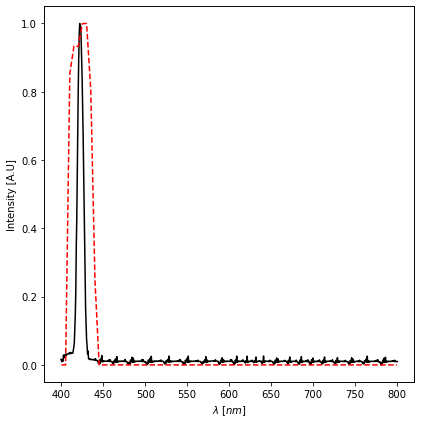

MLP_exp_2.csv
MLP_exp_sim_2.csv
(712, 2)
(81, 2)


<Figure size 432x288 with 0 Axes>

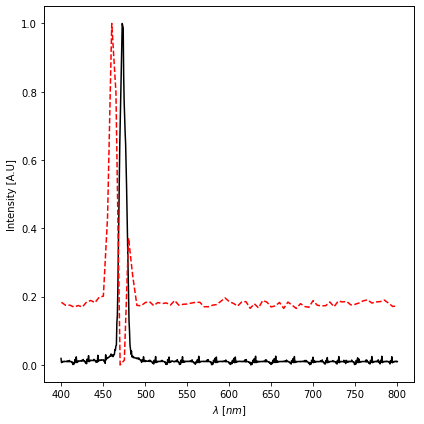

MLP_exp_3.csv
MLP_exp_sim_3.csv
(712, 2)
(81, 2)


<Figure size 432x288 with 0 Axes>

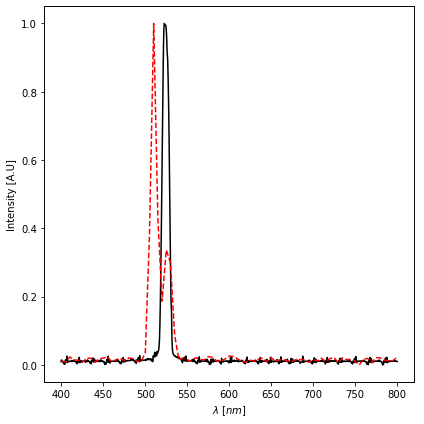

MLP_exp_4.csv
MLP_exp_sim_4.csv
(712, 2)
(81, 2)


<Figure size 432x288 with 0 Axes>

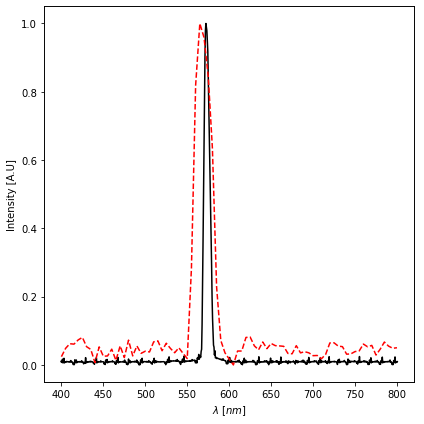

MLP_exp_5.csv
MLP_exp_sim_5.csv
(712, 2)
(81, 2)


<Figure size 432x288 with 0 Axes>

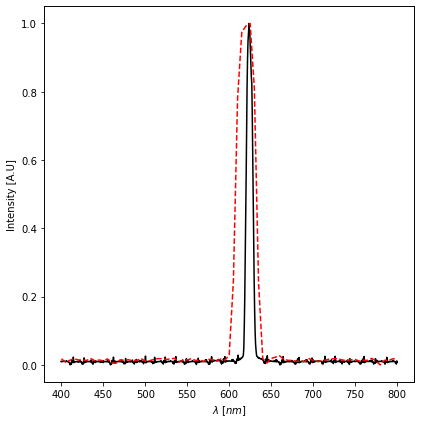

MLP_exp_6.csv
MLP_exp_sim_6.csv
(712, 2)
(81, 2)


<Figure size 432x288 with 0 Axes>

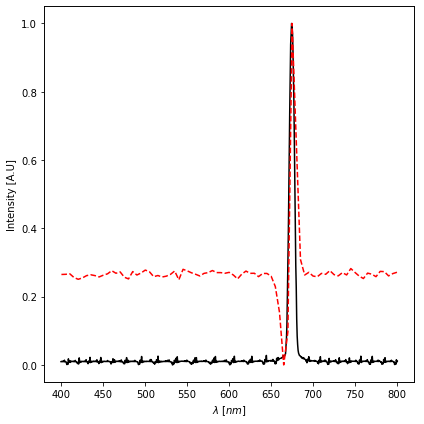

MLP_exp_8.csv
MLP_exp_sim_8.csv
(712, 2)
(81, 2)


<Figure size 432x288 with 0 Axes>

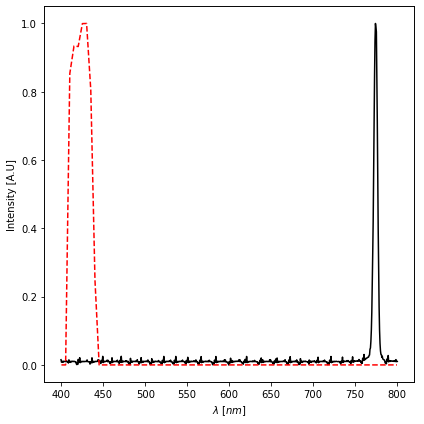

In [399]:
for exp, sim in zip(MLP_exp, MLP_exp_sim):
    print(exp)
    print(sim)
    df_exp_ = pd.read_csv("./CSV/" + exp, header=0, sep=";")
    df_exp_sim_ = pd.read_csv("./CSV/" + sim, header=0, sep=";")
    print((df_exp_.shape))
    print((df_exp_sim_.shape))
    plt.clf()
    plotSpectra4(df_exp_.iloc[:,0], df_exp_.iloc[:,1], df_exp_sim_.iloc[:,0], df_exp_sim_.iloc[:,1]) 
    plt.show()

RNN_exp_1.csv
RNN_exp_sim_1.csv
(712, 2)
(81, 2)


<Figure size 432x288 with 0 Axes>

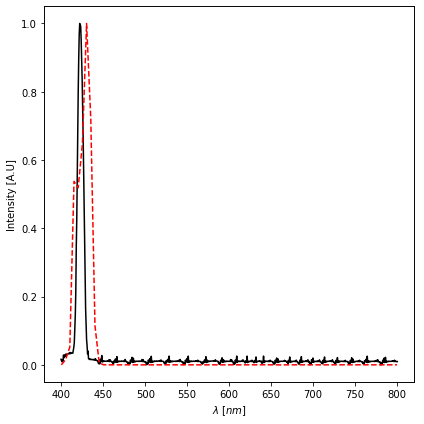

RNN_exp_2.csv
RNN_exp_sim_2.csv
(712, 2)
(81, 2)


<Figure size 432x288 with 0 Axes>

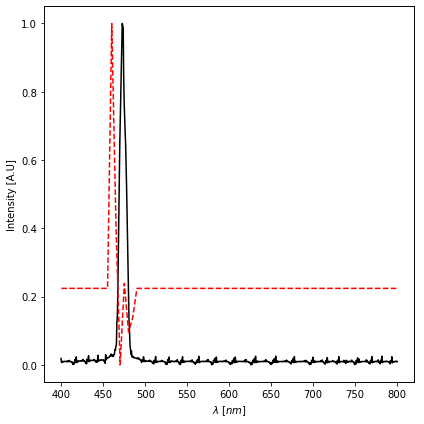

RNN_exp_3.csv
RNN_exp_sim_3.csv
(712, 2)
(81, 2)


<Figure size 432x288 with 0 Axes>

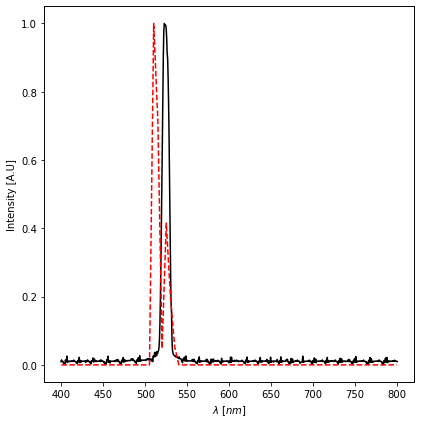

RNN_exp_4.csv
RNN_exp_sim_4.csv
(712, 2)
(81, 2)


<Figure size 432x288 with 0 Axes>

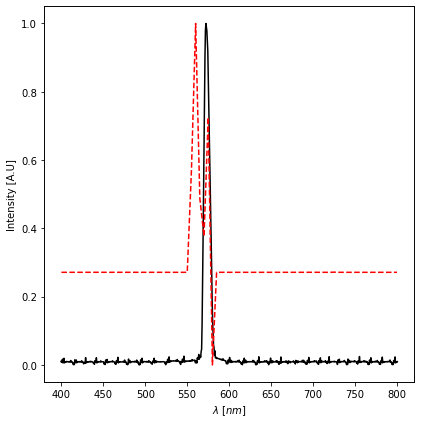

RNN_exp_5.csv
RNN_exp_sim_5.csv
(712, 2)
(81, 2)


<Figure size 432x288 with 0 Axes>

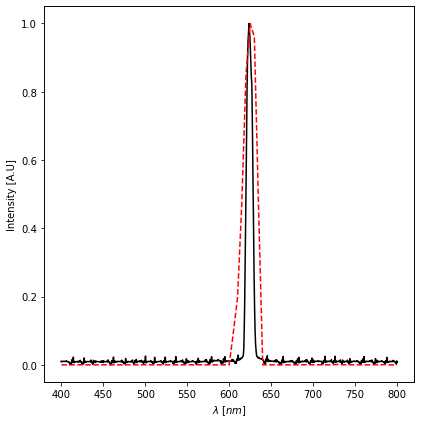

RNN_exp_6.csv
RNN_exp_sim_6.csv
(712, 2)
(81, 2)


<Figure size 432x288 with 0 Axes>

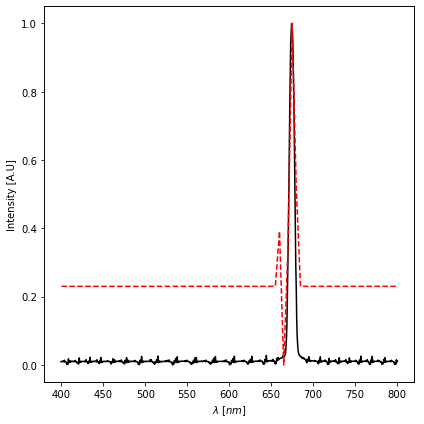

RNN_exp_8.csv
RNN_exp_sim_8.csv
(712, 2)
(81, 2)


<Figure size 432x288 with 0 Axes>

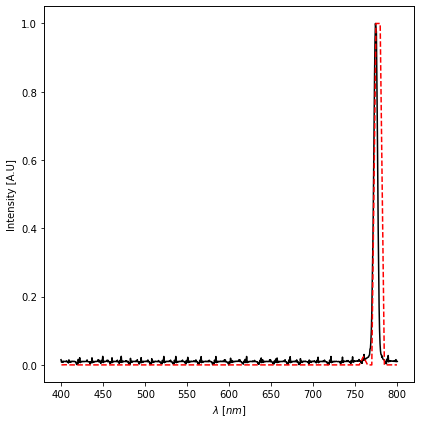

In [84]:
for exp, sim in zip(RNN_exp, RNN_exp_sim):
    print(exp)
    print(sim)
    df_exp_ = pd.read_csv("./CSV/" + exp, header=0, sep=";")
    df_exp_sim_ = pd.read_csv("./CSV/" + sim, header=0, sep=";")
    print((df_exp_.shape))
    print((df_exp_sim_.shape))
    plt.clf()
    plotSpectra4(df_exp_.iloc[:,0], df_exp_.iloc[:,1], df_exp_sim_.iloc[:,0], df_exp_sim_.iloc[:,1]) 
    plt.show()

## GAN model

In [319]:
from numpy import hstack
import numpy as np
from numpy import zeros
from numpy import ones
from numpy.random import rand
from numpy.random import randn
from keras.models import Sequential
from keras import Input
from keras.layers import Dense,LSTM
from matplotlib import pyplot
import matplotlib.pyplot as plt 

LENGTH_INPUT = 81

# define the standalone discriminator model
def define_discriminator(n_inputs=LENGTH_INPUT):
    model = Sequential()
    model.add(Dense(LENGTH_INPUT, activation='relu', input_dim=n_inputs))
    model.add(Dense(250, activation='relu', input_dim=n_inputs))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# define the standalone generator model
def define_generator(latent_dim, n_outputs=LENGTH_INPUT):
    model = Sequential()
    model.add(Input(shape=(latent_dim,)))
    #model.add(Input(shape=(latent_dim, 1)))
    #model.add(LSTM(100))
    model.add(Dense(LENGTH_INPUT, activation='linear'))
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
    return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

In [320]:
# generate n real samples with class labels
def generate_real_samples(n):
    amps = np.arange(0.1,10,0.1)
    bias = np.arange(0.1,10,0.1)
    freqs = np.linspace(1,2,1000)
    X2 = np.linspace(-5,5,LENGTH_INPUT)
    X1 = []
    for x in range(n):
        noise = np.random.normal(size=len(X2))
        X1.append(np.random.choice(amps)*np.sin(X2*np.random.choice(freqs))+np.random.choice(bias)+0.3*noise)
    X1 = np.array(X1).reshape(n, LENGTH_INPUT)
    # generate class labels
    y = ones((n, 1))
    return X1, y

def generate_real_samplesB(X, n):
    y = ones((n, 1))
    return X, y
    
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
    # generate points in the latent space
    x_input = randn(latent_dim * n)
    # reshape into a batch of inputs for the network
    x_input = x_input.reshape(n, latent_dim)
    return x_input

# use the generator to generate n fake examples, with class label = 0 (fake sample)
def generate_fake_samples(generator, latent_dim, n):
    # generate points in latent space
    x_input = generate_latent_points(latent_dim, n)
    
    # use for LSTM models
    #x_input = np.expand_dims(x_input, axis=1)
    #x_input = x_input[:, np.newaxis, :]
    
    # predict outputs
    X = generator.predict(x_input, verbose=0)

    # create class labels
    y = zeros((n, 1))
    #print(x_input)
    return X, y

In [321]:
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128, n_eval=200):
    # determine half the size of one batch, for updating the discriminator
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # prepare real samples
        x_real, y_real = generate_real_samplesB(P_lambda_train[0:64,:], half_batch)
        # prepare fake examples
        x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
        # update discriminator
        d_model.train_on_batch(x_real, y_real)
        d_model.train_on_batch(x_fake, y_fake)
        # prepare points in latent space as input for the generator
        x_gan = generate_latent_points(latent_dim, n_batch)
        # create inverted labels for the fake samples
        y_gan = ones((n_batch, 1))
        # update the generator via the discriminator's error
        gan_model.train_on_batch(x_gan, y_gan)
        # evaluate the model every n_eval epochs
        if (i+1) % n_eval == 0:
            plt.title('Number of epochs = %i'%(i+1))
            pred_data = generate_fake_samples(generator,latent_dim,latent_dim)[0]
            real_data = generate_real_samplesB(P_lambda_train[0:64,:], latent_dim)[0]
            plt.plot(pred_data[0],'-',label='Random Fake Sample',color='firebrick')
            plt.plot(real_data[0],'-',label = 'Random Real Sample',color='navy')
            plt.legend(fontsize=10)
            plt.show()

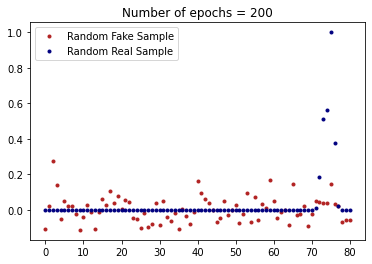

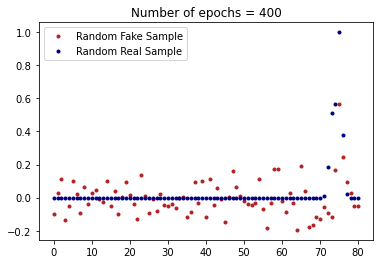

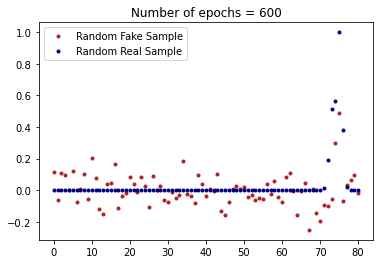

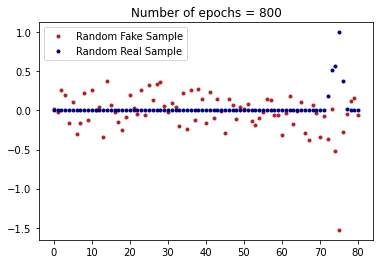

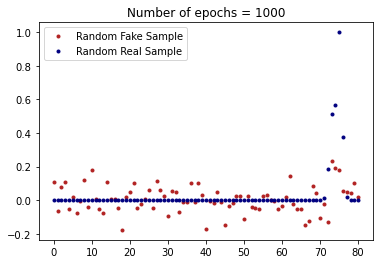

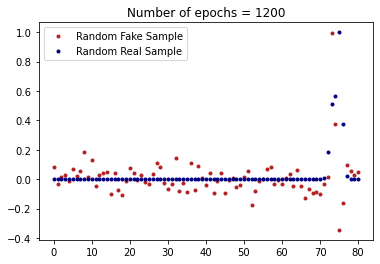

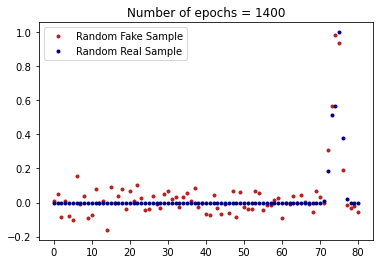

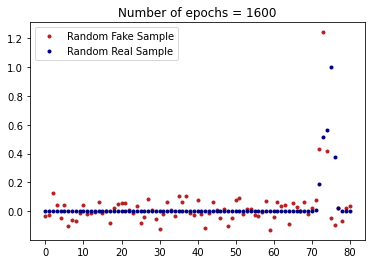

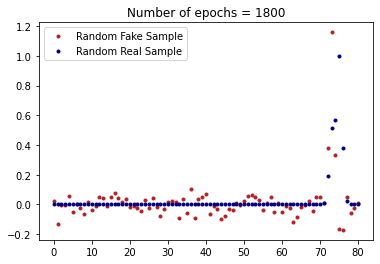

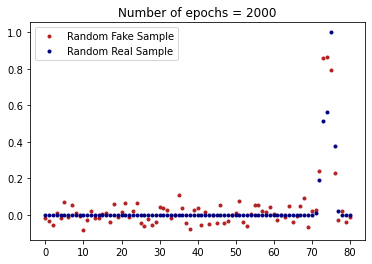

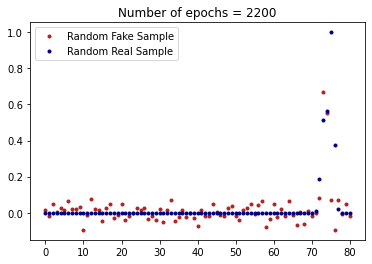

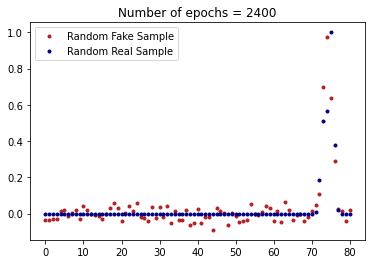

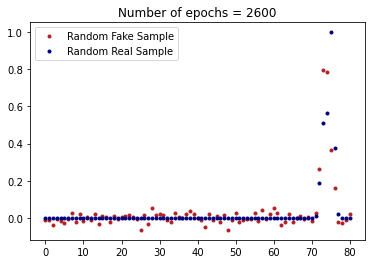

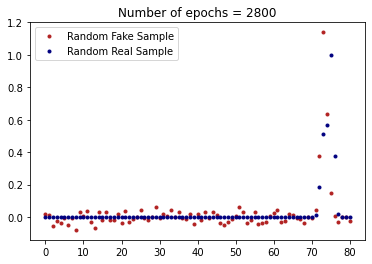

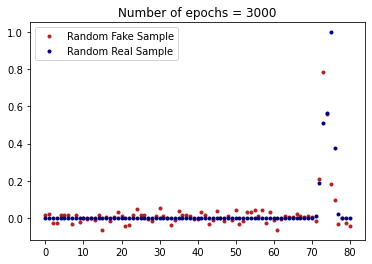

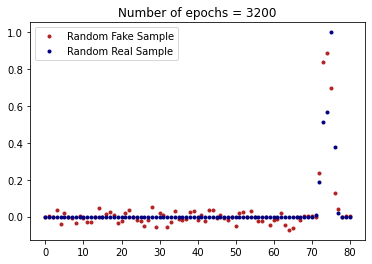

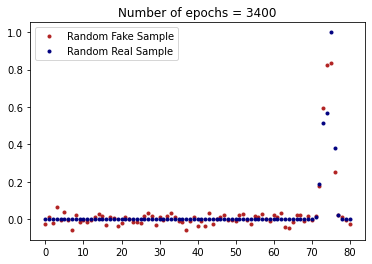

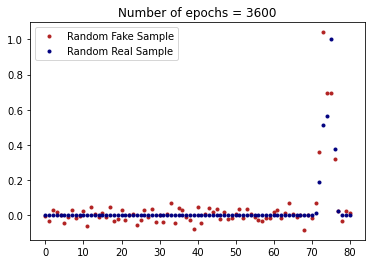

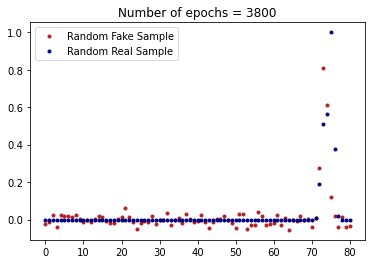

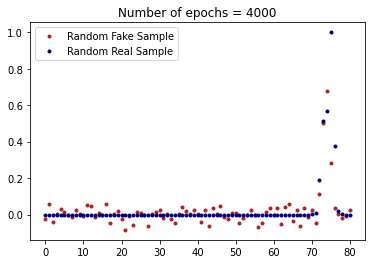

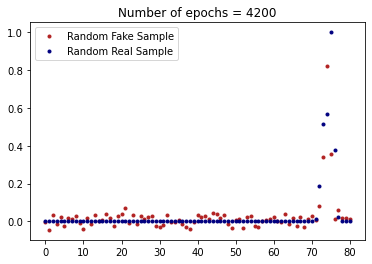

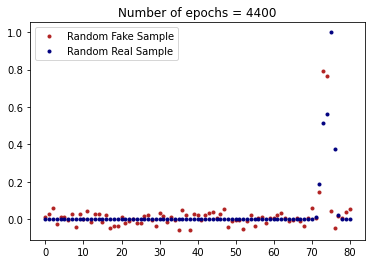

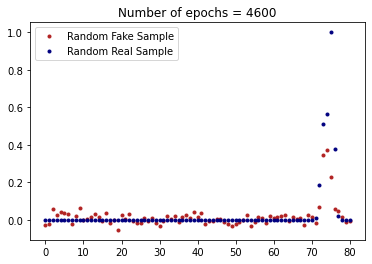

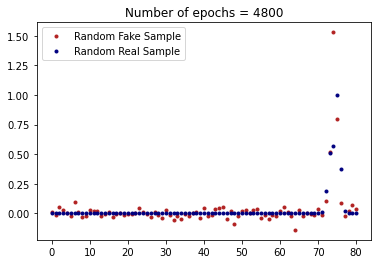

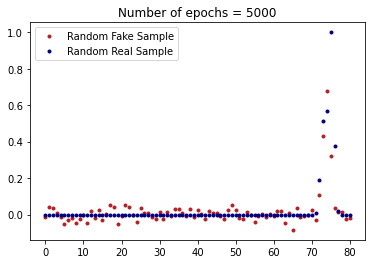

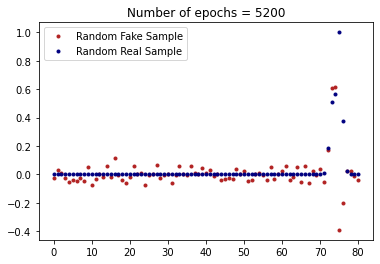

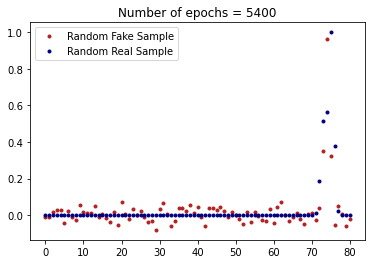

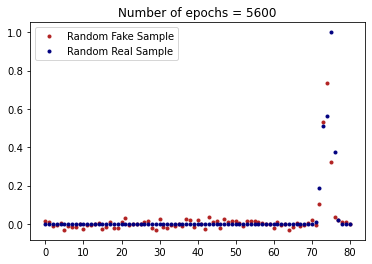

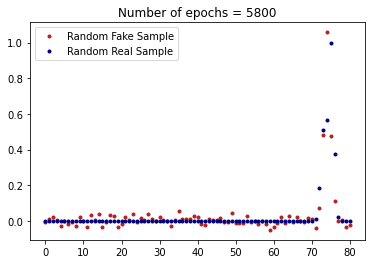

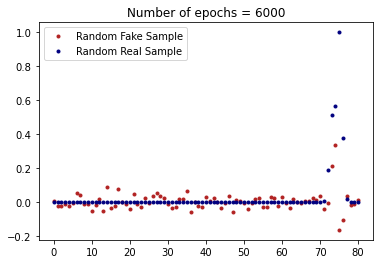

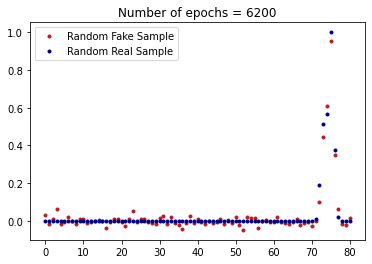

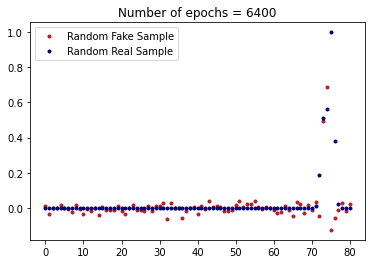

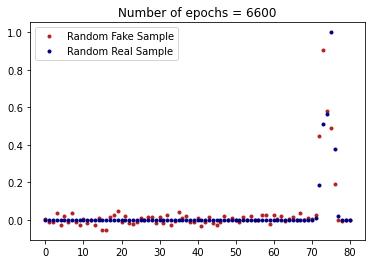

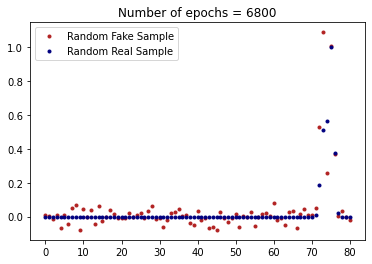

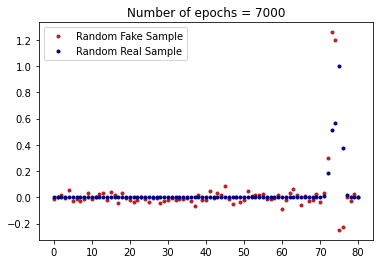

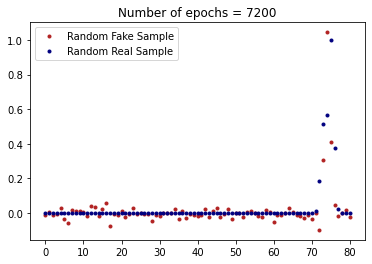

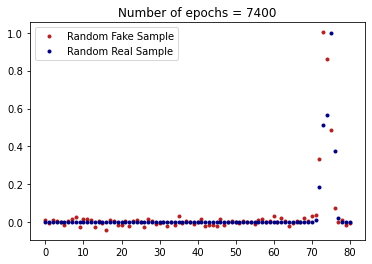

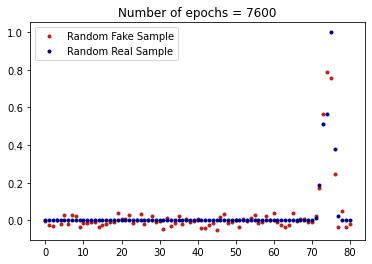

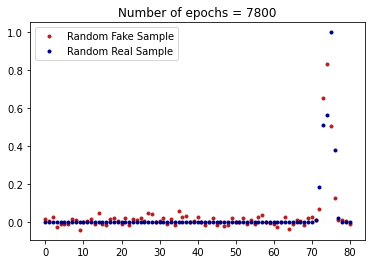

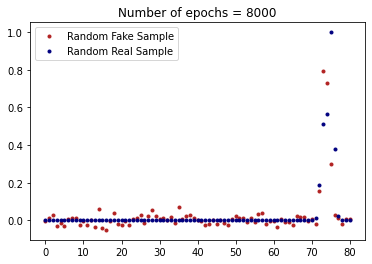

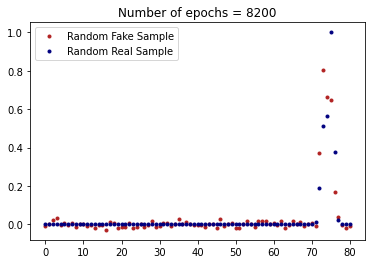

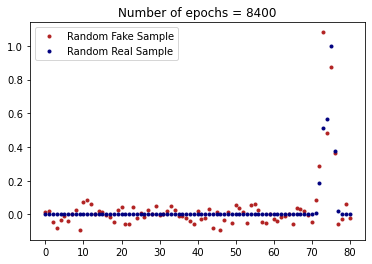

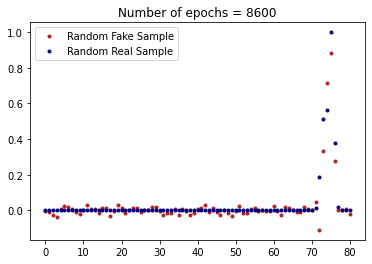

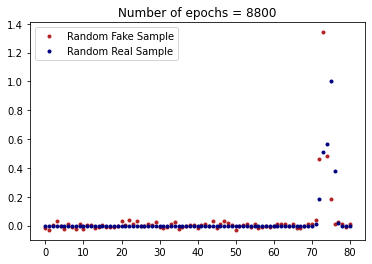

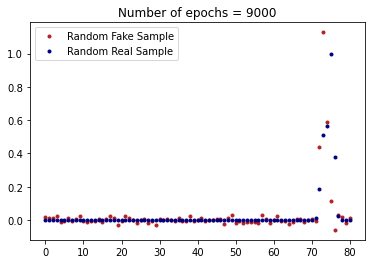

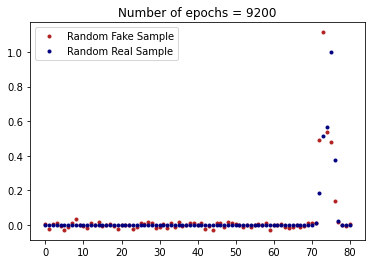

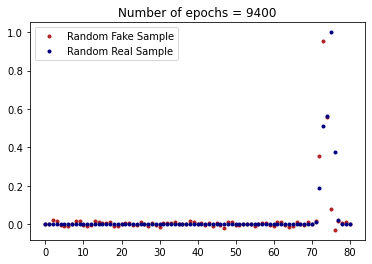

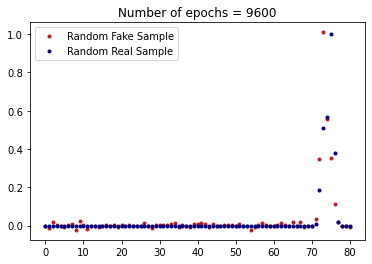

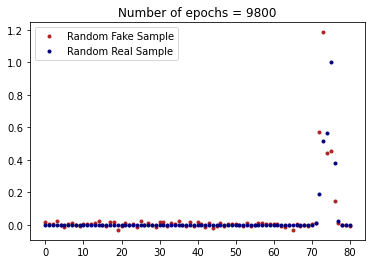

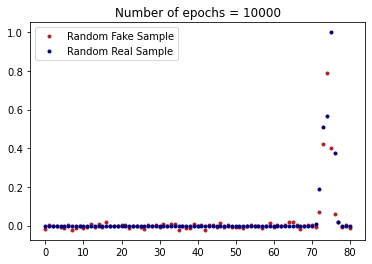

In [322]:
# size of the latent space
latent_dim = 3
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

In [315]:
P_lambda_train.shape

(72250, 81)

In [324]:
real_data  = P_lambda_train
pred_data = generate_fake_samples(generator,3,P_lambda_train.shape[0])[0]

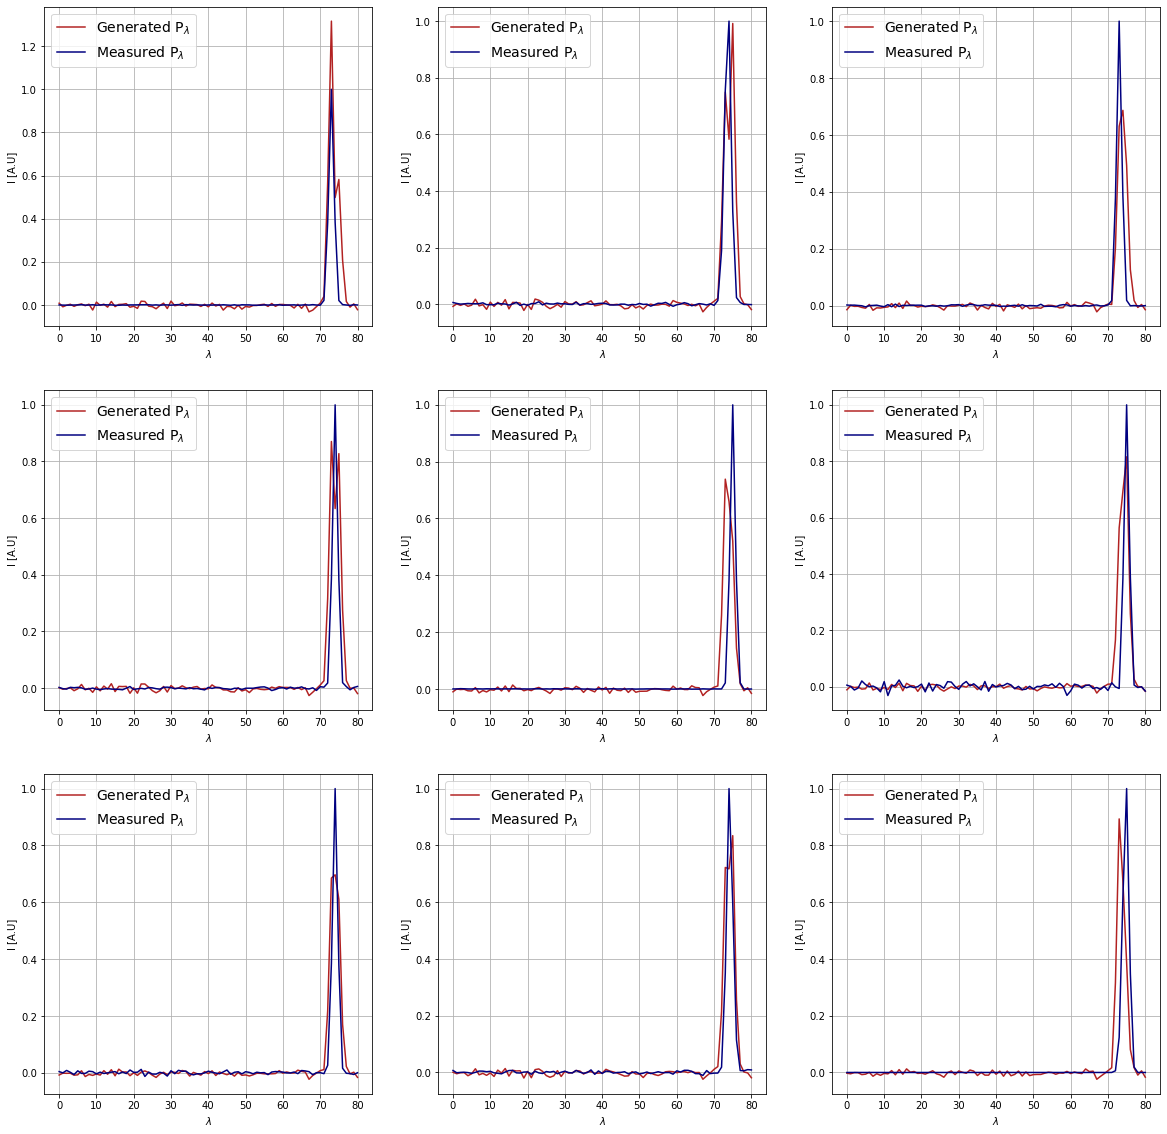

In [325]:
k=1
plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(3,3,k)
    J = np.random.choice(np.random.choice(range(0,len(pred_data))))
    plt.plot(pred_data[J],'-',color='firebrick',label='Generated P${_\lambda}$')
    plt.plot(real_data[J],'-',color='navy',label='Measured P$_{\lambda}$')
    plt.legend(fontsize=14)
    plt.xlabel('$\lambda$')
    plt.ylabel('I [A.U]')
    plt.grid(True)
    k=k+1